Theano 
===
An optimizing compiler for symbolic math expressions

In [37]:
import theano
import theano.tensor as T

Symbolic variables
==========

In [38]:
x = T.scalar()

In [39]:
x

<TensorType(float32, scalar)>

Variables can be used in expressions

In [40]:
y = 3*(x**2) + 1

this is a test


Result is symbolic as well

In [41]:
type(y)  


theano.tensor.var.TensorVariable

Investigating expressions

In [42]:
print(y)

Elemwise{add,no_inplace}.0


In [43]:
theano.pprint(y)

'((TensorConstant{3} * (<TensorType(float32, scalar)> ** TensorConstant{2})) + TensorConstant{1})'

In [44]:
theano.printing.debugprint(y)

Elemwise{add,no_inplace} [id A] ''   
 |Elemwise{mul,no_inplace} [id B] ''   
 | |TensorConstant{3} [id C]
 | |Elemwise{pow,no_inplace} [id D] ''   
 |   |<TensorType(float32, scalar)> [id E]
 |   |TensorConstant{2} [id F]
 |TensorConstant{1} [id G]


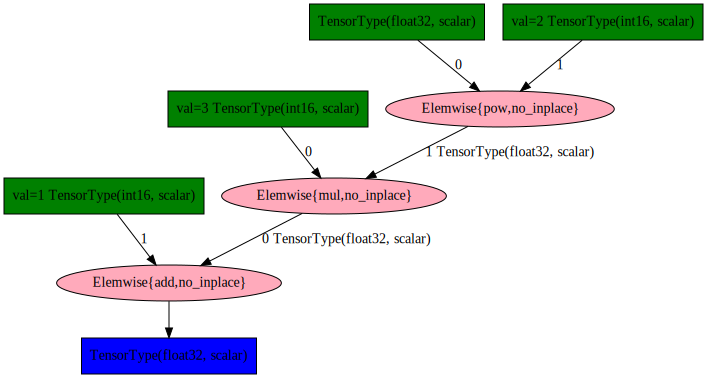

In [45]:
from IPython.display import SVG
SVG(theano.printing.pydotprint(y, return_image=True, format='svg'))

Evaluating expressions
============

Supply a `dict` mapping variables to values

In [46]:
y.eval({x: 100})

array(30001.0, dtype=float32)

Or compile a function

In [47]:
f = theano.function([x], y)

In [48]:
f(20)

array(1201.0, dtype=float32)

Compiled function has been transformed

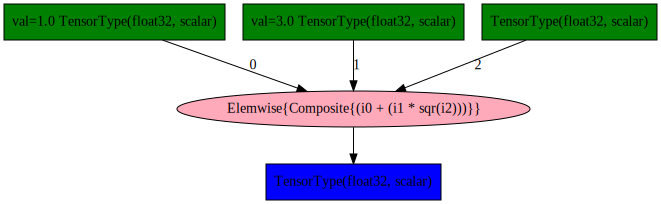

In [49]:
SVG(theano.printing.pydotprint(f, return_image=True, format='svg'))

Other tensor types
==========

In [50]:
X = T.vector()
X = T.matrix()
X = T.tensor3()
X = T.tensor4()

Numpy style indexing
===========

In [51]:
X = T.vector()

In [52]:
X[1:-1:2]

Subtensor{int64:int64:int64}.0

In [53]:
X[[1,2,3]]

AdvancedSubtensor1.0

Many functions/operations are available through `theano.tensor` or variable methods

In [54]:
y = X.argmax()

In [55]:
y = T.cosh(X)

In [56]:
y = T.outer(X, X)

But don't try to use numpy functions on Theano variables. Results may vary!

Automatic differention
============
- Gradients are free!

In [57]:
x = T.scalar()
y = T.log(x)

In [58]:
gradient = T.grad(y, x)
gradient.eval({x: 2})

array(0.5, dtype=float32)

# Shared Variables

- Symbolic + Storage

In [59]:
import numpy as np
x = theano.shared(np.zeros((2, 3), dtype=theano.config.floatX))

In [60]:
x

<TensorType(float32, matrix)>

We can get and set the variable's value

In [61]:
values = x.get_value()
print(values.shape)
print(values)

(2, 3)
[[ 0.  0.  0.]
 [ 0.  0.  0.]]


In [62]:
x.set_value(values)

Shared variables can be used in expressions as well

In [63]:
(x + 2) ** 2

Elemwise{pow,no_inplace}.0

Their value is used as input when evaluating

In [64]:
((x + 2) ** 2).eval()

array([[ 4.,  4.,  4.],
       [ 4.,  4.,  4.]], dtype=float32)

In [65]:
theano.function([], (x + 2) ** 2)()

array([[ 4.,  4.,  4.],
       [ 4.,  4.,  4.]], dtype=float32)

# Updates

- Store results of function evalution
- `dict` mapping shared variables to new values

In [66]:
count = theano.shared(0)
new_count = count + 1
updates = {count: new_count}

f = theano.function([], count, updates=updates)

In [67]:
f()

array(0)

In [68]:
f()

array(1)

In [69]:
f()

array(2)